# To do

* Graph labels
* Likelihood of finishing top 10 in pos, top 20 based on draft slot

# Import packages and define functions

In [2]:
###################### Import Packages #############################################
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from ffb_functions import *
import seaborn as sns
####################################### Functions ######################################
#shifted = pd.read_csv('redraft_metrics.csv')

In [4]:
for_graphs = pd.read_csv('/Users/JoshCoven/Desktop/Github_Repos/fantasy_football_scraping/data/for_graphs.csv')
#shifted.groupby('Year').count()
for_graphs.groupby('Year').count()
for_graphs = for_graphs[['Name', 'Year', 'FantPos', 'Overall', 'PPR', 'pts_next_year']]
for_graphs['ADP_Pos_Rank'] = for_graphs.groupby(['Year', 'FantPos'
                                                           ])['Overall'].rank()
for_graphs['Actual_Next_Pos_Rank'] = for_graphs.groupby(['Year', 'FantPos'])['pts_next_year'
                                               ].rank(ascending = False)
#for_graphs

# Why RBs get drafted first

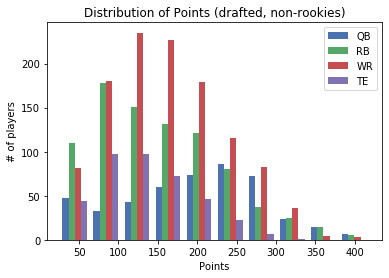

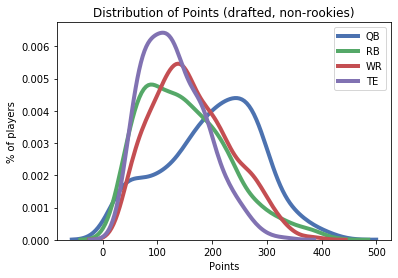

In [5]:
########## together but not on top of each other
plt.style.use('seaborn-deep')

plt.hist([for_graphs['PPR'].loc[for_graphs.FantPos == 'QB'],
         for_graphs['PPR'].loc[for_graphs.FantPos == 'RB'],
         for_graphs['PPR'].loc[for_graphs.FantPos == 'WR'],
         for_graphs['PPR'].loc[for_graphs.FantPos == 'TE']], 
        #alpha = 0.3,
        label = ['QB', 'RB', 'WR', 'TE'])
plt.ylabel('# of players')
plt.xlabel('Points')
plt.title('Distribution of Points (drafted, non-rookies)')
plt.legend(loc='upper right')
plt.savefig('non_rookie_hist.png')
plt.show()
#print('\n')

# Density Plot
for i in ['QB', 'RB', 'WR', 'TE']:
    data = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    sns.distplot(data['PPR'], hist=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = i)
    plt.ylabel('% of players')
    plt.xlabel('Points')
    plt.title('Distribution of Points (drafted, non-rookies)')
plt.savefig('non_rookie_dist.png')
plt.show()


# Likelihood of finishing in top x of position
## Top WR's are more likely to maintain success, but also more likely to bust

QB


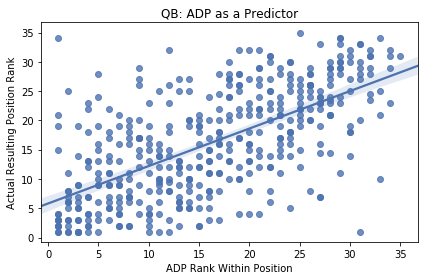

RB


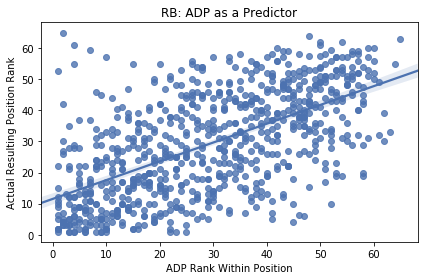

WR


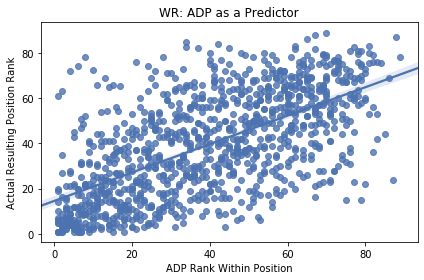

TE


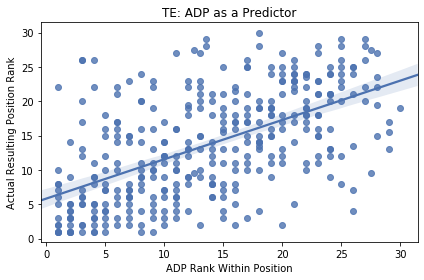

QB
RB
WR
TE


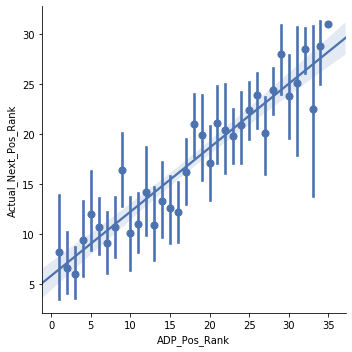

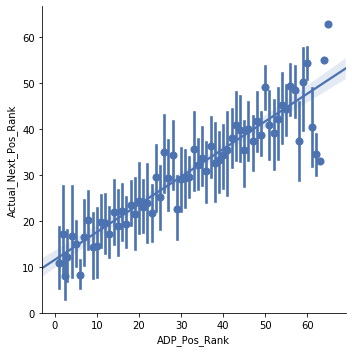

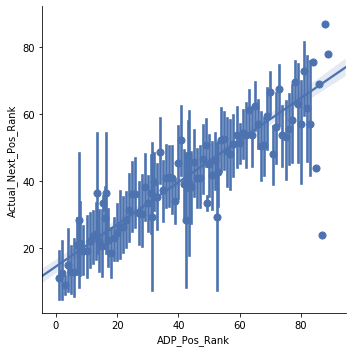

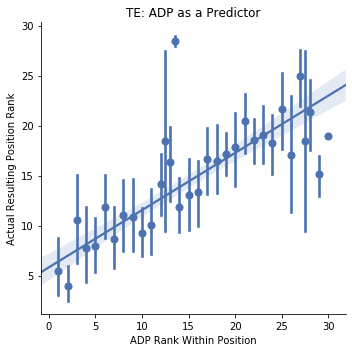

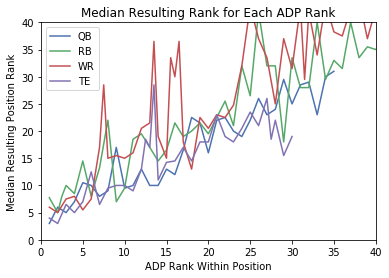

In [67]:
for_graphs = for_graphs.loc[for_graphs.Year != 2018].reset_index(drop = True)
for i in ['QB', 'RB', 'WR', 'TE']:
    print(i)
    data = for_graphs.loc[for_graphs.FantPos == i]
    sns.regplot(x="ADP_Pos_Rank", y="Actual_Next_Pos_Rank", data=data);
    plt.xlabel("ADP Rank Within Position")
    plt.ylabel("Actual Resulting Position Rank")
    plt.title(str(i) + ': ADP as a Predictor')
    plt.tight_layout()
    plt.show()
    
for i in ['QB', 'RB', 'WR', 'TE']:
    print(i)
    data = for_graphs.loc[for_graphs.FantPos == i]
    sns.lmplot(x="ADP_Pos_Rank", y="Actual_Next_Pos_Rank", data=data, x_estimator=np.mean);
    plt.xlabel("ADP Rank Within Position")
    plt.ylabel("Actual Resulting Position Rank")
    plt.title(str(i) + ': ADP as a Predictor')
    plt.tight_layout()
    plt.show()

for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    #print(testdf)
    plt.plot(testdf['ADP_Pos_Rank'], testdf['Actual_Next_Pos_Rank'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Median Resulting Position Rank")
plt.xlim([0, 40])
plt.ylim([0, 40])
plt.legend()
plt.title('Median Resulting Rank for Each ADP Rank')
plt.show()


# likelihood of finishing top 10 in position

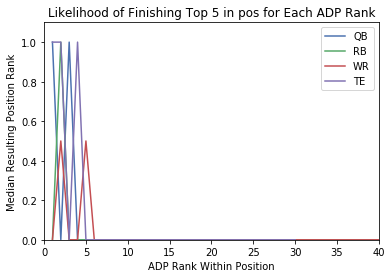

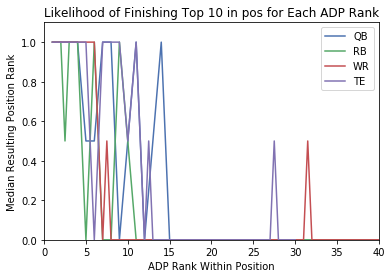

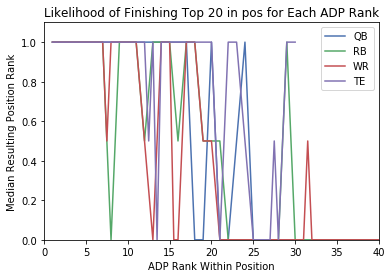

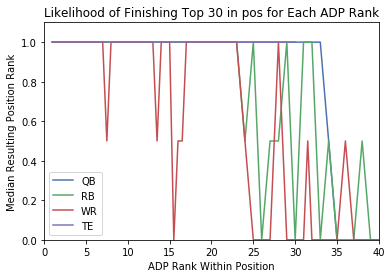

In [22]:
for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    #print(testdf)
    plt.plot(testdf['ADP_Pos_Rank'], testdf['top_5_finish'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Median Resulting Position Rank")
plt.xlim([0, 40])
plt.ylim([0, 1.1])
plt.legend()
plt.title('Likelihood of Finishing Top 5 in pos for Each ADP Rank')
plt.show()

for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    #print(testdf)
    plt.plot(testdf['ADP_Pos_Rank'], testdf['top_10_finish'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Median Resulting Position Rank")
plt.xlim([0, 40])
plt.ylim([0, 1.1])
plt.legend()
plt.title('Likelihood of Finishing Top 10 in pos for Each ADP Rank')
plt.show()


for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    #print(testdf)
    plt.plot(testdf['ADP_Pos_Rank'], testdf['top_20_finish'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Median Resulting Position Rank")
plt.xlim([0, 40])
plt.ylim([0, 1.1])
plt.legend()
plt.title('Likelihood of Finishing Top 20 in pos for Each ADP Rank')
plt.show()

for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    #print(testdf)
    plt.plot(testdf['ADP_Pos_Rank'], testdf['top_30_finish'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Median Resulting Position Rank")
plt.xlim([0, 40])
plt.ylim([0, 1.1])
plt.legend()
plt.title('Likelihood of Finishing Top 30 in pos for Each ADP Rank')
plt.show()



# likelihood of finishing at each different spot



RB


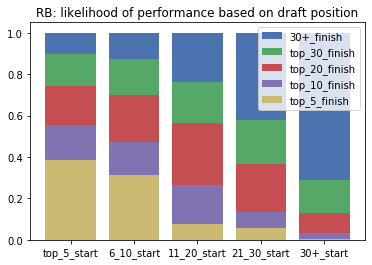



WR


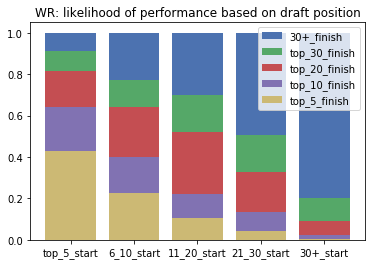



QB


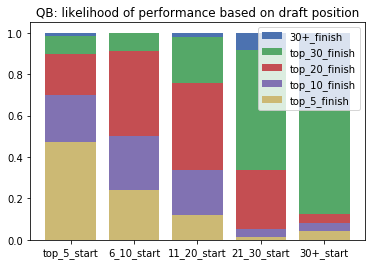



TE


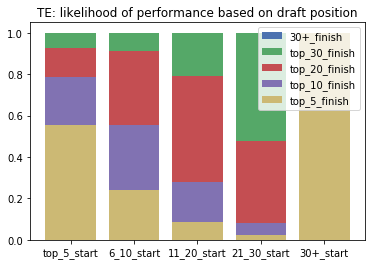

In [65]:
for_graphs['top_5_finish'] = for_graphs['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 6 else 0)
for_graphs['top_10_finish'] = for_graphs['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 11 else 0)
for_graphs['top_20_finish'] = for_graphs['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 21 else 0)
for_graphs['top_30_finish'] = for_graphs['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 31 else 0)
for_graphs['30+_finish'] = 1

for_graphs['top_5_start'] = for_graphs['ADP_Pos_Rank'].apply(lambda x: 1 if x < 6 else 0)
for_graphs['6_10_start'] = for_graphs['ADP_Pos_Rank'].apply(lambda x: 1 if (x < 11) & (x > 5)
                                                            else 0)
for_graphs['11_20_start'] = for_graphs['ADP_Pos_Rank'].apply(lambda x: 1 if (x < 21) & (x > 10)
                                                             else 0)
for_graphs['21_30_start'] = for_graphs['ADP_Pos_Rank'].apply(lambda x: 1 if (x < 31) & (x > 20)
                                                             else 0)
for_graphs['30+_start'] = for_graphs['ADP_Pos_Rank'].apply(lambda x: 1 if x > 30 else 0)

new_frame = pd.DataFrame(columns = ['QB', 'RB', 'WR', 'TE'])
rb_frame = pd.DataFrame(columns = ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start'])
wr_frame = pd.DataFrame(columns = ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start'])
qb_frame = pd.DataFrame(columns = ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start'])
te_frame = pd.DataFrame(columns = ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start'])

cols = ['top_5_finish', 'top_10_finish', 'top_20_finish', 'top_30_finish', '30+_finish']

for y in ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start']:
    #print(y)
    
    for i in ['RB', 'WR', 'QB', 'TE']:
        #print(i)
        
        test2 = for_graphs.loc[(for_graphs.FantPos == i) & (for_graphs[y] == 1)
                              ].reset_index(drop = True)
        #print(test2)
        val = test2.mean()
        #print(val[cols])
        new_frame[i] = val[cols]
    new_frame = new_frame.fillna(1)
    rb_frame[y] = new_frame['RB']
    wr_frame[y] = new_frame['WR']
    qb_frame[y] = new_frame['QB']
    te_frame[y] = new_frame['TE']
#plt.show()
    new_frame
    #for i in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish', 'top_5_finish']:
     #   plt.bar(['QB', 'RB', 'WR', 'TE'], new_frame.loc[i, :], label = i)
    #plt.legend()
    #plt.savefig(str(y) + '_all_likelihood.png')
    #plt.show()
    

print('\n')
print('RB')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(#[0, 1, 2, 3, 4]
        ['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start']
            , rb_frame.loc[col, :], label = col#, width = 0.25
    )
plt.legend()
plt.title('RB: likelihood of performance based on draft position')
plt.savefig('rb_likelihood.png')
plt.show()


print('\n')
print('WR')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start']
            , wr_frame.loc[col, :], label = col)
plt.legend()
plt.title('WR: likelihood of performance based on draft position')
plt.savefig('wr_likelihood.png')

plt.show()

print('\n')
print('QB')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start']
            , qb_frame.loc[col, :], label = col)
plt.legend()
plt.title('QB: likelihood of performance based on draft position')
plt.savefig('qb_likelihood.png')
plt.show()

print('\n')
print('TE')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_10_start', '11_20_start', '21_30_start', '30+_start']
            , te_frame.loc[col, :], label = col)
plt.legend()
plt.title('TE: likelihood of performance based on draft position')
plt.savefig('te_likelihood.png')
plt.show()

# Value above replacement analysis

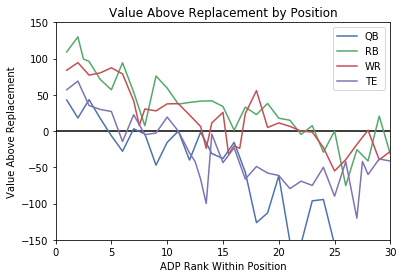

258.35
141.85
188.0
148.4


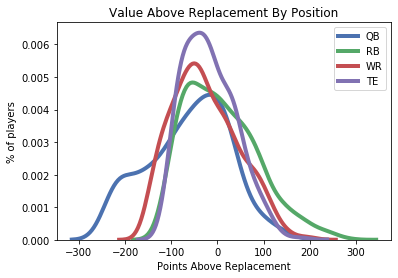

In [64]:
VAR = {
    'QB': [10, 0]
    , 'RB': [25, 0]
    , 'WR': [25, 0]
    , 'TE': [10, 0]
}

for i in ['QB', 'RB', 'WR', 'TE']:
    testdf = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    testdf = testdf.groupby('ADP_Pos_Rank').median().reset_index()
    VAR[i][1] = testdf.pts_next_year.iloc[VAR[i][0]]
    testdf['VAR'] = testdf['pts_next_year'] - VAR[i][1]
    plt.plot(testdf['ADP_Pos_Rank'], testdf['VAR'], label = i)

plt.xlabel("ADP Rank Within Position")
plt.ylabel("Value Above Replacement")
plt.xlim([0, 30])
plt.ylim([-150, 150])
plt.legend()
plt.hlines(0, 0, 30)
plt.title('Value Above Replacement by Position')
plt.show()
    
    
for i in ['QB', 'RB', 'WR', 'TE']:
    data = for_graphs.loc[for_graphs.FantPos == i].reset_index(drop = True)
    data['VAR'] = data['PPR'] - VAR[i][1]
    print(VAR[i][1])
    sns.distplot(data['VAR'], hist=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = i)
    plt.ylabel('% of players')
    plt.xlabel('Points Above Replacement')
    plt.title('Value Above Replacement By Position')
#plt.savefig('non_rookie_dist.png')
plt.show()



# How good is points at predicting rank finish within a position

WR


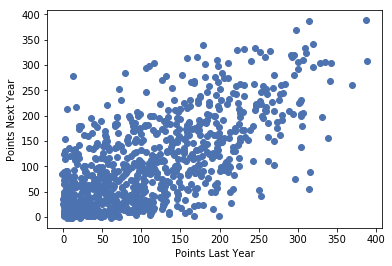



QB


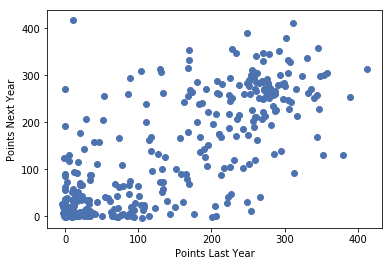



RB


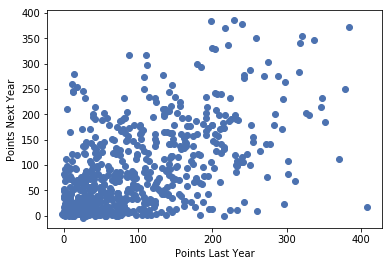



TE


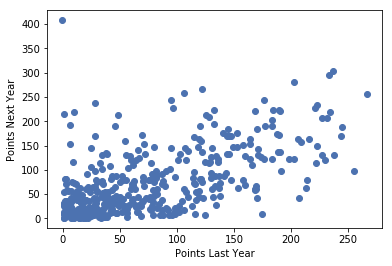

In [40]:
print('WR')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'WR'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'WR'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('QB')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'QB'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'QB'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('RB')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'RB'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'RB'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()
print('\n')

print('TE')
plt.scatter(shifted['PPR'].loc[shifted.FantPos == 'TE'],
            shifted['pts_next_year'].loc[shifted.FantPos == 'TE'])
plt.xlabel("Points Last Year")
plt.ylabel("Points Next Year")
plt.show()

In [41]:
shifted

,Rk,Name,Tm,FantPos,Age,G,GS,Cmp,PaAtt,PaYds,...,Int_per_PaAtt,Rec_per_tgt,ReTD_per_rec,start_frac,Tgt_per_game,PaAtt_per_game,RuAtt_per_game,Tm_prev_year,Tm_change_flag,Fant_Share
0,357,A.J. Derby,2TM,TE,25.0,10.0,3.0,0.0,0.0,0.0,...,NaN,0.800000,0.000000,0.300000,2.000000,0.000000,0.000000,NaN,NaN,NaN
1,271,A.J. Derby,2TM,TE,26.0,11.0,1.0,0.0,0.0,0.0,...,NaN,0.525000,0.095238,0.090909,3.636364,0.000000,0.000000,2TM,1.0,NaN
2,388,A.J. Derby,MIA,TE,27.0,4.0,0.0,0.0,0.0,0.0,...,NaN,0.600000,0.333333,0.000000,1.250000,0.000000,0.000000,2TM,1.0,0.011645
3,13,A.J. Green,CIN,WR,24.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.591463,0.113402,1.000000,10.250000,0.000000,0.250000,NaN,NaN,0.231756
4,12,A.J. Green,CIN,WR,25.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.550562,0.112245,1.000000,11.125000,0.000000,0.000000,CIN,0.0,0.204673
5,59,A.J. Green,CIN,WR,26.0,13.0,13.0,0.0,0.0,0.0,...,NaN,0.589744,0.086957,1.000000,9.000000,0.000000,0.153846,CIN,0.0,0.157814
6,17,A.J. Green,CIN,WR,27.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.651515,0.116279,1.000000,8.250000,0.000000,0.000000,CIN,0.0,0.185547
7,101,A.J. Green,CIN,WR,28.0,10.0,10.0,0.0,0.0,0.0,...,NaN,0.660000,0.060606,1.000000,10.000000,0.000000,0.000000,CIN,0.0,0.134926
8,27,A.J. Green,CIN,WR,29.0,16.0,16.0,0.0,0.0,0.0,...,NaN,0.524476,0.106667,1.000000,8.937500,0.000000,0.000000,CIN,0.0,0.197682
9,118,A.J. Green,CIN,WR,30.0,9.0,9.0,0.0,0.0,0.0,...,NaN,0.597403,0.130435,1.000000,8.555556,0.000000,0.000000,CIN,0.0,0.113336


In [45]:
for pos in ['QB', 'RB', 'WR', 'TE']:
    print(pos)
    ycol = 'ppg_next_year'
    xcols = 'PPR'
    frame = shifted.loc[shifted.FantPos == pos].reset_index(drop = True)
    frame = frame[['Name', ycol, xcols]].dropna()
    formula = ycol + " ~ " + xcols
    model = smf.ols(formula, frame)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': frame['Name']})
    print(results.summary())
    print('\n')

QB
                            OLS Regression Results                            
Dep. Variable:          ppg_next_year   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     451.9
Date:                Sat, 24 Aug 2019   Prob (F-statistic):           4.54e-39
Time:                        13:40:58   Log-Likelihood:                -1029.9
No. Observations:                 340   AIC:                             2064.
Df Residuals:                     338   BIC:                             2071.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0483      0.461     10.943      

# Position Rank

In [22]:
new_df = shifted[['Name', 'PosRank', 'FantPos', 'Year']].sort_values(['PosRank', 'Year']).loc[pd.notna(shifted.FantPos)].reset_index(drop = True)
new_df
newer_df = shift_col(new_df, 'PosRankNextYear', 'PosRank', -1).sort_values(['Name', 'Year'])
newer_df

,Name,PosRank,FantPos,Year,PosRankNextYear
0,A.J. Derby,62.0,TE,2016,42.0
1,A.J. Derby,42.0,TE,2017,77.0
2,A.J. Derby,77.0,TE,2018,NaN
3,A.J. Green,4.0,WR,2012,5.0
4,A.J. Green,5.0,WR,2013,23.0
5,A.J. Green,23.0,WR,2014,8.0
6,A.J. Green,8.0,WR,2015,35.0
7,A.J. Green,35.0,WR,2016,10.0
8,A.J. Green,10.0,WR,2017,37.0
9,A.J. Green,37.0,WR,2018,NaN


In [23]:
for pos in ['QB', 'RB', 'WR', 'TE']:
    print(pos)
    ycol = 'PosRankNextYear'
    xcols = 'PosRank'
    frame = newer_df.loc[newer_df.FantPos == pos].reset_index(drop = True)
    frame = frame[['Name', ycol, xcols]].dropna()
    formula = ycol + " ~ " + xcols
    model = smf.ols(formula, frame)
    results = model.fit(cov_type='cluster', cov_kwds={'groups': frame['Name']})
    print(results.summary())
    print('\n')

QB
                            OLS Regression Results                            
Dep. Variable:        PosRankNextYear   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.03e-23
Time:                        11:13:24   Log-Likelihood:                -1575.3
No. Observations:                 358   AIC:                             3155.
Df Residuals:                     356   BIC:                             3162.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1944      2.238      5.449      

# Positional ADP

In [31]:
adp_frame = ADP_assembly(2010, 2020)
adp_frame

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,#,Bye,Graph,High,Low,Name,Overall,Pick,Pos,Std.Dev,Team,TimesDrafted,Unnamed: 10,Year
0,1,NaN,NaN,1.01,2.12,Chris Johnson,1.4,1.01,RB,1.3,TEN,422,NaN,2010
1,2,NaN,NaN,1.01,2.11,Adrian Peterson,2.3,1.02,RB,1.3,MIN,342,NaN,2010
2,3,NaN,NaN,1.01,2.10,Ray Rice,3.2,1.03,RB,1.5,BAL,203,NaN,2010
3,4,NaN,NaN,1.01,2.09,Maurice Jones-Drew,4.7,1.05,RB,1.5,JAX,325,NaN,2010
4,5,NaN,NaN,1.01,5.01,Andre Johnson,4.8,1.05,WR,2.6,HOU,427,NaN,2010
5,6,NaN,NaN,1.04,2.08,Frank Gore,6.2,1.06,RB,1.5,SF,369,NaN,2010
6,7,NaN,NaN,1.01,2.05,Aaron Rodgers,7.8,1.08,QB,2.6,GB,344,NaN,2010
7,8,NaN,NaN,1.02,5.02,Randy Moss,8.1,1.08,WR,2.9,TEN,302,NaN,2010
8,9,NaN,NaN,1.03,2.06,Michael Turner,9.1,1.09,RB,2.1,ATL,312,NaN,2010
9,10,NaN,NaN,1.05,5.03,Reggie Wayne,11.2,1.11,WR,3.2,IND,307,NaN,2010


In [34]:
adp_frame.loc[adp_frame.Year == 2019]

,#,Bye,Graph,High,Low,Name,Overall,Pick,Pos,Std.Dev,Team,TimesDrafted,Unnamed: 10,Year
1650,1,11.0,NaN,1.01,1.05,Saquon Barkley,1.4,1.01,RB,0.7,NYG,690,NaN,2019
1651,2,9.0,NaN,1.01,1.06,Alvin Kamara,2.5,1.02,RB,0.8,NO,572,NaN,2019
1652,3,7.0,NaN,1.01,1.06,Christian McCaffrey,2.5,1.03,RB,0.8,CAR,738,NaN,2019
1653,4,8.0,NaN,1.01,1.11,Ezekiel Elliott,4.6,1.05,RB,1.3,DAL,643,NaN,2019
1654,5,10.0,NaN,1.01,1.10,DeAndre Hopkins,5.1,1.05,WR,1.4,HOU,749,NaN,2019
1655,6,11.0,NaN,1.01,2.01,Davante Adams,6.8,1.07,WR,1.7,GB,676,NaN,2019
1656,7,12.0,NaN,1.01,2.05,David Johnson,7.4,1.07,RB,2.4,ARI,709,NaN,2019
1657,8,4.0,NaN,1.02,2.06,LeVeon Bell,8.4,1.08,RB,2.6,NYJ,754,NaN,2019
1658,9,9.0,NaN,1.02,2.09,Julio Jones,9.4,1.09,WR,2.0,ATL,779,NaN,2019
1659,10,9.0,NaN,1.03,2.06,Michael Thomas,9.8,1.10,WR,2.2,NO,862,NaN,2019


# Rookies

In [330]:
rk = pd.read_csv('rookie_database.csv')
rk = rk.rename(columns = {'PPR': 'pts_next_year'})

rk = rk.loc[pd.notna(rk.Name)].reset_index(drop = True)
rk = rk[['Name', 'FantPos', 'Year', 'pts_next_year', 'Overall']]
rk

,Name,FantPos,Year,pts_next_year,Overall
0,eli manning,QB,2004,51.2,153.38
1,larry fitzgerald,WR,2004,185.4,79.45
2,philip rivers,QB,2004,4.8,182.25
3,kellen winslow,TE,2004,10.0,71.14
4,roy williams,WR,2004,183.8,114.72
...,...,...,...,...,...
465,terry mclaurin,WR,2019,0.0,96.25
466,alexander mattison,RB,2019,0.0,125.71
467,tony pollard,RB,2019,0.0,162.33
468,ryquell armstead,RB,2019,0.0,201.00


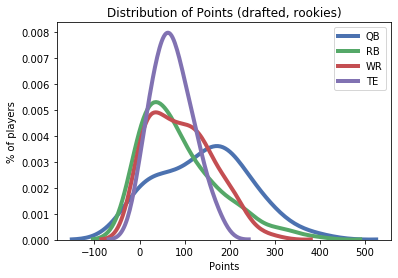

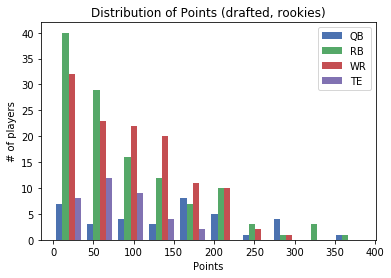

In [415]:
rk.groupby('Year').count()
# Density Plot
for i in ['QB', 'RB', 'WR', 'TE']:
    data = rk.loc[rk.FantPos == i].reset_index(drop = True)
    sns.distplot(data['pts_next_year'], hist=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label = i)
    plt.ylabel('% of players')
    plt.xlabel('Points')
    plt.title('Distribution of Points (drafted, rookies)')
plt.savefig('rookie_dist.png')
plt.show()


plt.style.use('seaborn-deep')
plt.hist([rk['pts_next_year'].loc[rk.FantPos == 'QB'],
         rk['pts_next_year'].loc[rk.FantPos == 'RB'],
         rk['pts_next_year'].loc[rk.FantPos == 'WR'],
         rk['pts_next_year'].loc[rk.FantPos == 'TE']], 
        #alpha = 0.3,
        label = ['QB', 'RB', 'WR', 'TE'])
plt.ylabel('# of players')
plt.xlabel('Points')
plt.title('Distribution of Points (drafted, rookies)')
plt.legend(loc='upper right')
plt.show()

In [388]:
# need to merge rookie frame with final, to see likelihood of rookie finishing near top of all pos

rk = rk.loc[rk.Year != 2019].reset_index(drop = True)
rk = rk.loc[rk.Year > 2004].reset_index(drop = True)
rk['Year'] = rk['Year'] - 1
rk['rookie'] = 1

non_rk = pd.read_csv('for_graphs.csv')
non_rk = non_rk[['Name', 'Year', 'FantPos', 'pts_next_year', 'Overall']]
non_rk = non_rk.loc[non_rk.Year != 2018].reset_index(drop = True)
non_rk['rookie'] = 0
combined = rk.append(non_rk).reset_index(drop = True)

combined['ADP_Pos_Rank'] = combined.groupby(['Year', 'FantPos'])['Overall'].rank()
combined['Actual_Next_Pos_Rank'] = combined.groupby(['Year', 'FantPos'])['pts_next_year'].rank(ascending = False)

In [398]:
combined.loc[(combined.rookie == 1) & (combined.ADP_Pos_Rank < 30)]
#combined.loc[(combined.Year == 2002) & (combined.ADP_Pos_Rank < 16) & (combined.rookie == 1)]
#combined.loc[(combined.Year == 2004) & (combined.Actual_Next_Pos_Rank < 10)]

,FantPos,Name,Overall,Year,pts_next_year,rookie,ADP_Pos_Rank,Actual_Next_Pos_Rank,top_5_finish,top_10_finish,top_20_finish,top_30_finish,30+_finish,top_5_start,6_10_start,11+_start,6_20_start,20+_start
1,TE,brandon pettigrew,185.86,2004,76.6,1,21.0,17.0,0,0,1,1,1,0,0,1,0,1
2,QB,mark sanchez,162.60,2004,138.4,1,28.0,22.0,0,0,0,1,1,0,0,1,0,1
8,RB,knowshon moreno,63.99,2004,198.0,1,21.0,13.0,0,0,1,1,1,0,0,1,0,1
12,RB,donald brown,97.94,2004,74.0,1,27.0,40.0,0,0,0,0,1,0,0,1,0,1
17,TE,jared cook,218.24,2004,16.4,1,27.0,27.0,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,RB,sony michel,70.22,2013,139.1,1,24.0,23.0,0,0,0,1,1,0,0,1,0,1
289,RB,ronald jones,102.31,2013,20.7,1,29.0,58.0,0,0,0,0,1,0,0,1,0,1
291,RB,royce freeman,59.01,2013,101.3,1,19.0,33.0,0,0,0,0,1,0,0,1,1,0
293,TE,mike gesicki,160.36,2013,40.2,1,16.0,31.0,0,0,0,0,1,0,0,1,1,0


top_5_start


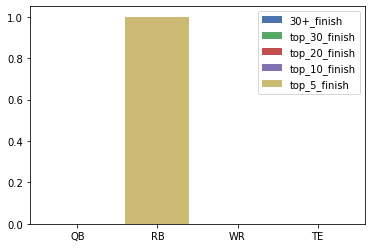

6_20_start


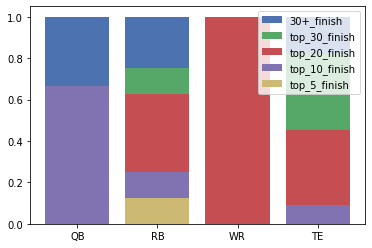

20_40_start


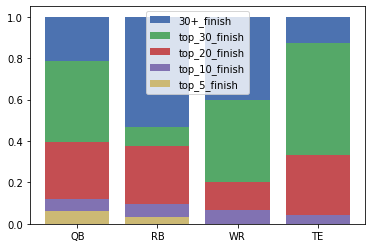

40+_start


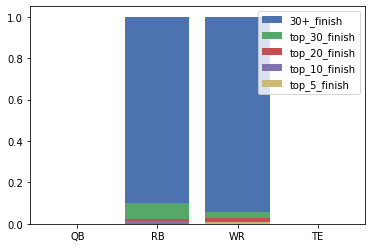



RB


ValueError: shape mismatch: objects cannot be broadcast to a single shape

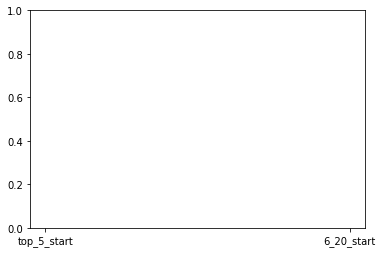

In [400]:
combined['top_5_finish'] = combined['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 6 else 0)
combined['top_10_finish'] = combined['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 11 else 0)
combined['top_20_finish'] = combined['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 21 else 0)
combined['top_30_finish'] = combined['Actual_Next_Pos_Rank'].apply(lambda x: 1 if x < 31 else 0)
combined['30+_finish'] = 1

combined['top_5_start'] = combined['ADP_Pos_Rank'].apply(lambda x: 1 if x < 6 else 0)
combined['6_20_start'] = combined['ADP_Pos_Rank'].apply(lambda x: 1 if (x < 21) & (x > 5)
                                                            else 0)
combined['20_40_start'] = combined['ADP_Pos_Rank'].apply(lambda x: 1 if (x < 41) & (x > 20)
                                                             else 0)

combined['40+_start'] = combined['ADP_Pos_Rank'].apply(lambda x: 1 if (x > 40)
                                                             else 0)


new_frame = pd.DataFrame(columns = ['QB', 'RB', 'WR', 'TE'])
rb_frame = pd.DataFrame(columns = ['top_5_start', '6_20_start', '20+_start', '21_30_start', 'outside_30_start'])
wr_frame = pd.DataFrame(columns = ['top_5_start', '6_20_start', '20+_start', '21_30_start', 'outside_30_start'])
qb_frame = pd.DataFrame(columns = ['top_5_start', '6_20_start', '20+_start', '21_30_start', 'outside_30_start'])
te_frame = pd.DataFrame(columns = ['top_5_start', '6_20_start', '20+_start', '21_30_start', 'outside_30_start'])

cols = ['top_5_finish', 'top_10_finish', 'top_20_finish', 'top_30_finish', '30+_finish']

for y in ['top_5_start', '6_20_start','20_40_start', '40+_start']:
    print(y)
    
    for i in ['QB', 'RB', 'WR', 'TE']:
        #print(i)
        
        test2 = combined.loc[(combined.FantPos == i) & (combined[y] == 1) & (combined['rookie'] == 1)
                              ].reset_index(drop = True)
        #print(test2)
        val = test2.mean()
        #print(val[cols])
        new_frame[i] = val[cols]
    new_frame = new_frame.fillna(0)
    rb_frame[y] = new_frame['RB']
    wr_frame[y] = new_frame['WR']
    qb_frame[y] = new_frame['QB']
    te_frame[y] = new_frame['TE']
#plt.show()
    new_frame
    for i in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish', 'top_5_finish']:
        plt.bar(['QB', 'RB', 'WR', 'TE'], new_frame.loc[i, :], label = i)
    plt.legend()
    plt.show()
    
print('\n')
print('RB')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_20_start','20_40_start', '40+_start']
            , rb_frame.loc[col, :], label = col)
plt.legend()
plt.show()


print('\n')
print('WR')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_20_start','20_40_start', '40+_start']
            , wr_frame.loc[col, :], label = col)
plt.legend()
plt.show()

print('\n')
print('QB')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_20_start','20_40_start', '40+_start']
            , qb_frame.loc[col, :], label = col)
plt.legend()
plt.show()

print('\n')
print('TE')
for col in ['30+_finish', 'top_30_finish', 'top_20_finish', 'top_10_finish',  'top_5_finish']:
    plt.bar(['top_5_start', '6_20_start','20_40_start', '40+_start']
            , te_frame.loc[col, :], label = col)
plt.legend()
plt.tight_layout()
plt.show()

In [310]:
rk

,Name,FantPos,Year,pts_next_year,Overall
0,eli manning,QB,2004,51.2,153.38
1,larry fitzgerald,WR,2004,185.4,79.45
2,philip rivers,QB,2004,4.8,182.25
3,kellen winslow,TE,2004,10.0,71.14
4,roy williams,WR,2004,183.8,114.72
...,...,...,...,...,...
436,marquez valdes-scantling,WR,2018,111.0,295.73
437,equanimeous st. brown,WR,2018,54.3,238.18
438,john kelly,RB,2018,12.1,210.56
439,boston scott,RB,2018,0.0,269.57
